## Raw data
We have discussed the raw data we will use in the general introduction notebook. 
Now we will use bash commands to look in these files.

### file location
The sequencing reads are already available in the folder 'data/reads'. 
To keep the practical feasible, we have made a subset of the original data.

In this reads folder, you will find 12 files.
L and P stand for the leaf and plant samples.
L1 L2 L3 are the biological replicates. 
R1 and R2 represent the forward and reverse Illumina reads. 
So 2 samples * 3 replicates * 2 directions = 12 files
Files are stored in a fastq format (.fastq) which are compressed in gzip archives (.gz). 
The gzip compression format is widely used in the genomics field. 
Fastq files often compress down to only a quarter of the filesize with gzip! 
These days, you rarely ever need to extract these; all modern software can read these compressed fastq files.

**[DO] Lets first double check if all files are available.**

* use the `ls` command to see what files are present in the `data/reads/` folder
* issue this command in the cell below:
* confirm you see all `.fastq.gz` files

In [1]:
ls data/reads

L1.R1.fastq.gz  L2.R2.fastq.gz  P1.R1.fastq.gz  P2.R2.fastq.gz
L1.R2.fastq.gz  L3.R1.fastq.gz  P1.R2.fastq.gz  P3.R1.fastq.gz
L2.R1.fastq.gz  L3.R2.fastq.gz  P2.R1.fastq.gz  P3.R2.fastq.gz


### View a gzipped file
To decompress and print a gzipped file to your screen, you can use the zcat command like this
> zcat path/to/file.gz

Note that the content of gzipped files often is quite big. 
So big even that you may crash this webpage. 
To prevent this from happening, 'pipe' the output of `zcat` to `head` to display only the first ten lines like so:

> zcat path/to/file.gz | head

**[DO] Now, in the cell below, check the first ten lines of one of the fastq files like so:**

* use the `zcat` command
* type yourself the path to one of the `fastq.gz` files we have seen in `ls` before
* use a 'pipe' and the **head** command to only display the first ten lines of the output.

In [1]:
zcat data/reads/L1.R1.fastq.gz | head

@ERR2114809.1 NS500813:28:H3M3VAFXX:1:11101:2702:1014/1
TNTCTACCTATAACTAAGGCAATCAGCGCAATCAATTCCCAAAATGAACCTGTGGGAAAGAAAAGACGAGAAATTAGTACCGCCGCAATGCCTTTGAAACCTTCAGACAGCACTGCCAAAATACCCACCAATTTGCCGCCGTGATAAAA
+
A#AAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE<EEEEEEEEEEEE<EEEEEEAEEEEEEE/EE<EEEEAEEEEEEEEEAEEEEEEAA<<AAEAEEAA<666<AAAAAAEEE
@ERR2114809.2 NS500813:28:H3M3VAFXX:1:11101:9398:1015/1
CNTCTGCTGTAGACACTAAGAATAAACCTTCTATTTGGAAGGTAGTTATAAATAATCTCATTAATTTACCCTGGACTTGGCGAATTACAATTATCTACTTAACTTTCATGTTATTTATGCCCATAGTGGCCATGTTTCTAAAAGTGAGTA
+
A#AAAEEEEEEEEEEEEEEEEEEAEEEEEEEEEEEEEEEEEAEEEEEAEEEEE<EEEEEEEEEAEEEEEAEEEEEEEEEEEEEAEEEEEEAAEEAEEEEEEEEEEEEEAEEE<AA/EAA<A6A<EEEEE<AEEEEEEEE<AE<AAAEEEE
@ERR2114809.3 NS500813:28:H3M3VAFXX:1:11101:6665:1015/1
CNACCAATCGCAATGGAGCCGCGCGTCGGCTGCTCCAGTCCCGAGATCATTGTCAGGAGCGTCGATTTAAGGCATCCAGAAGGCCCGACAAGAACCGTGAACGCCCCATGCGGCACGTTCAGGGTGAGGGGGGGATGGATCTCTAGCGCTC

gzip: stdout: Broken pipe


There is no need to be alarmed by the 'broken pipe' error message. Still, do you understand what the error means?

> `zcat` wants to "push"the entire `L1.R1.fastq.gz` file through the pipe to `head`. However, the `head` command closes the pipe after 10 lines (like it's supposed to). `zcat` cannot do its job, and hence gives you an error message, from the perspective of `zcat` the pipe is broken.

**[Q] Do these look as we would expect?**

**[A]** Yes, the fastq file contains reads with information spread over four lines.:
1. a name
2. sequence
3. +
4. a quality line.

We only see 10 lines because we used the `head` command. 

Note that the regular `cat` command prints regular files to your screen. 
The `zcat` command is just a variant of this for compressed files.

> cat is short for conCATenate,  zcat is short for something like gZipped-conCATenate


### Counting reads
Now, I want you to find out how many reads there are in a single fastq file. You will achieve this in two steps.

First, using grep, we can select for lines in a file that contain only the word/key specified in the grep command.
As you can see in the above command, the headers of the reads always start with the "@", therefor if we only want to see the headers, we can grep for the "@" using the command below:

**[DO:] In the cell below, create a command that uses**
1. `zcat`  to open the fastq.gz file.
2. `grep '@'`   to print only lines with an '@'. So only the headers of the FastQ file.
3. `head`  to show you only the first ten lines and thus not crash our webpage.

Again, use pipes to feed the output from one programme to the next.

In [2]:
zcat data/reads/L1.R1.fastq.gz | grep '@' | head

@ERR2114809.1 NS500813:28:H3M3VAFXX:1:11101:2702:1014/1
@ERR2114809.2 NS500813:28:H3M3VAFXX:1:11101:9398:1015/1
@ERR2114809.3 NS500813:28:H3M3VAFXX:1:11101:6665:1015/1
@ERR2114809.4 NS500813:28:H3M3VAFXX:1:11101:14041:1015/1
@ERR2114809.5 NS500813:28:H3M3VAFXX:1:11101:14890:1015/1
@ERR2114809.6 NS500813:28:H3M3VAFXX:1:11101:19927:1016/1
@ERR2114809.7 NS500813:28:H3M3VAFXX:1:11101:26515:1016/1
@ERR2114809.8 NS500813:28:H3M3VAFXX:1:11101:7791:1016/1
@ERR2114809.9 NS500813:28:H3M3VAFXX:1:11101:6269:1017/1
@ERR2114809.10 NS500813:28:H3M3VAFXX:1:11101:16102:1017/1
grep: write error: Broken pipe

gzip: stdout: Broken pipe


In the output you just created in step one, every line contains a header representing one sequence. 
The second step now is to count these lines. 
To count the number of lines, we will first have to read in the gzip file, then grep on the headers, and then we can use the word count command to count the number of lines. 

**[DO:] First read the 'help page' of the `wc` command by typing in the cell below:**

> wc --help

In [4]:
wc --help

Usage: wc [OPTION]... [FILE]...
  or:  wc [OPTION]... --files0-from=F
Print newline, word, and byte counts for each FILE, and a total line if
more than one FILE is specified.  A word is a non-zero-length sequence of
characters delimited by white space.

With no FILE, or when FILE is -, read standard input.

The options below may be used to select which counts are printed, always in
the following order: newline, word, character, byte, maximum line length.
  -c, --bytes            print the byte counts
  -m, --chars            print the character counts
  -l, --lines            print the newline counts
      --files0-from=F    read input from the files specified by
                           NUL-terminated names in file F;
                           If F is - then read names from standard input
  -L, --max-line-length  print the maximum display width
  -w, --words            print the word counts
      --help     display this help and exit
      --version  output version information and 

What option do we need to provide `wc` to count lines? Deduce from the manual page.

**[DO:] Now Finally, make a new 'pipeline' using**
1. `zcat`  to open the fastq.gz file
2. `grep '@'`   to filter out only headers 
3. `wc` + options to count the lines in the fastq file.


In [5]:
zcat data/reads/L1.R1.fastq.gz | grep '@' | wc -l

1000000


In [11]:
zcat data/reads/L1.R1.fastq.gz | grep '@' -c

1000000


**[Q:] How many sequences are in the FastQ file, is this number remarkable?**

**[A]** The FastQ file contains exactly 1 million reads. 
This is a remarkable round number and does not match with the number from the FastQC report ([10613642 for Sample L1 forward](https://lauradijkhuizen.com/metagenomicspractical/fastqc_reports/L1.R1.fastqcreport.html)).
The reads for this practical were subsetted to 1 million, to make the steps a bit more feasible and quick.

So now you have executed some bash commands and investigated the output. 
Well done!

## Assembled data
Calculating a de-novo metagenome assembly is beyond the scope of this practical, so we have done this for you. 
You will however, analyse this assembly yourself! :)

**[DO:] Let's start by looking at the assembly files in the folder** `data/assembly`**.**


In [7]:
ls data/assembly

scaffolds.fasta.gz


Now, look at the first ten lines of the assembly with the `head` command.

Will you use `zcat` to open the assembly? 
Only if the assembly is a compressed `scaffolds.fasta.gz` file. 
If you are dealing with a 'regular' fasta file, use `cat`. 

Finally, after using head, also type `| cut -c 1-500` This *cut*s out *c*haracter *1 to 500*.
If you skip that last step, you may overload this web page.

**[DO:] Use** `(z)cat`**,** `head`**, and** `cut -c 1-500` **to look at the first lines of the assembly'**

In [1]:
zcat data/assembly/scaffolds.fasta.gz | cut -c 1-500 | head

>NODE_1_length_1935275_cov_24.6805_ID_23901540
CAATCGTGCCGACGTTGCAATGCGGCTTGTTACGCTCAAATTTAGCCTTCGCCATGTCCGTACAATCCTAAAAACCAGAATTGAAATCGTATCTTAACTACTTTGCCGTAAACCGGTCAGGGACCGATCCACCGCGAAACTCTGGAGCGGGTGACGGGAATCGAACCCGCGTAGCCAGCTTGGAAGGCTGGAGCTCTACCATTGAGCTACACCCGCCCGCTCACTAGCGAGTTCACACCCGCCAACACCTCGCAACATCGCGCCACCAACCAATAAACACATGCCATAACAGGCAGAATGCTCATCGGGGAGCTTGGTGGAAGGGGTAGGATTCGAACCTACGTAGGCCGAAGCCAACGGGTTTACAGCCCGTCCCCTTTAGCCACTCGGGCACCCTTCCATCTCGCTCGACTCCGCTCAGCGGAGACGCGGACTTATGAGCATTTAACCACCCGTGTCAACTTGAAATCACAGCAAAAACTCCCGTTCGCGCCGATTTC
>NODE_2_length_1021023_cov_23.722_ID_28578184
GGCGCGGGCTTTTGCTTGCGCAGCGCTCCAGCACCTACAATCTCGAACCCGTAGCCTTGTCGAAAAGATGGGCCTTGCCGACATCCGGCGCGAGGTGAATGGTCTCGCCGGGCTGAAGGGCGATGCGTTCACGGAAGAGGCCGACGATGTCGTGGTTGCCAAGGCGGACCACGACTTGTGTTTCCGATCCGGTCGGCTCGATGACGACGACCTTCACGGGGATTCCGGCATCGGAGACCGTGAAATGTTCCGGCCGAATGCCGTAGATCAGGGGCTTGCCCGCGGTATCTGAAGGGGCAGCGCTGAGCGGCAGGTGGACACCTTCCGGTGTTACGAAGCTGGGCCGCCCGTCGCTGCCGATTGCCACTGTGCCGTCGATCAGATTCATCGACGGTGAGCCGATGAA

Next, we will assess the number of sequences in the assembly.
Remember how we did this for the FastQ file?

Also, remember that the headers for FastQ files and Fasta files are not the same.

1. `(z)cat` the assembly file
2. `grep` the headers
3. `wc` to count the lines.

**[DO:] Assess the number of scaffolds in the metagenome assembly.**

In [9]:
zcat data/assembly/scaffolds.fasta.gz | grep '>' | wc -l

18623


In [10]:
zcat data/assembly/scaffolds.fasta.gz | grep '>' -c

18623


**[Q:] Do you remember from the lecture any reasons that assemblies may be split up over this amount of contigs?** 

**[A]**
In a (de bruijn) graph assembly, ambiguities may exist which results in unsolvable structures in the graph.
These are for example:
* highly conserved genes that are shared by multiple organisms (such as the 16s rRNA gene).
* repetitive regions within one particular genome (which is the case for *N. azollae* the main symbiont [Reference](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0011486))
* two similar organisms with similar genomes

This is a snapshot of the de bruijn graph that lead to this metagenome assembly.
Assembly graphs can be visualised, filtered and searched through with [Bandage](https://github.com/rrwick/Bandage).

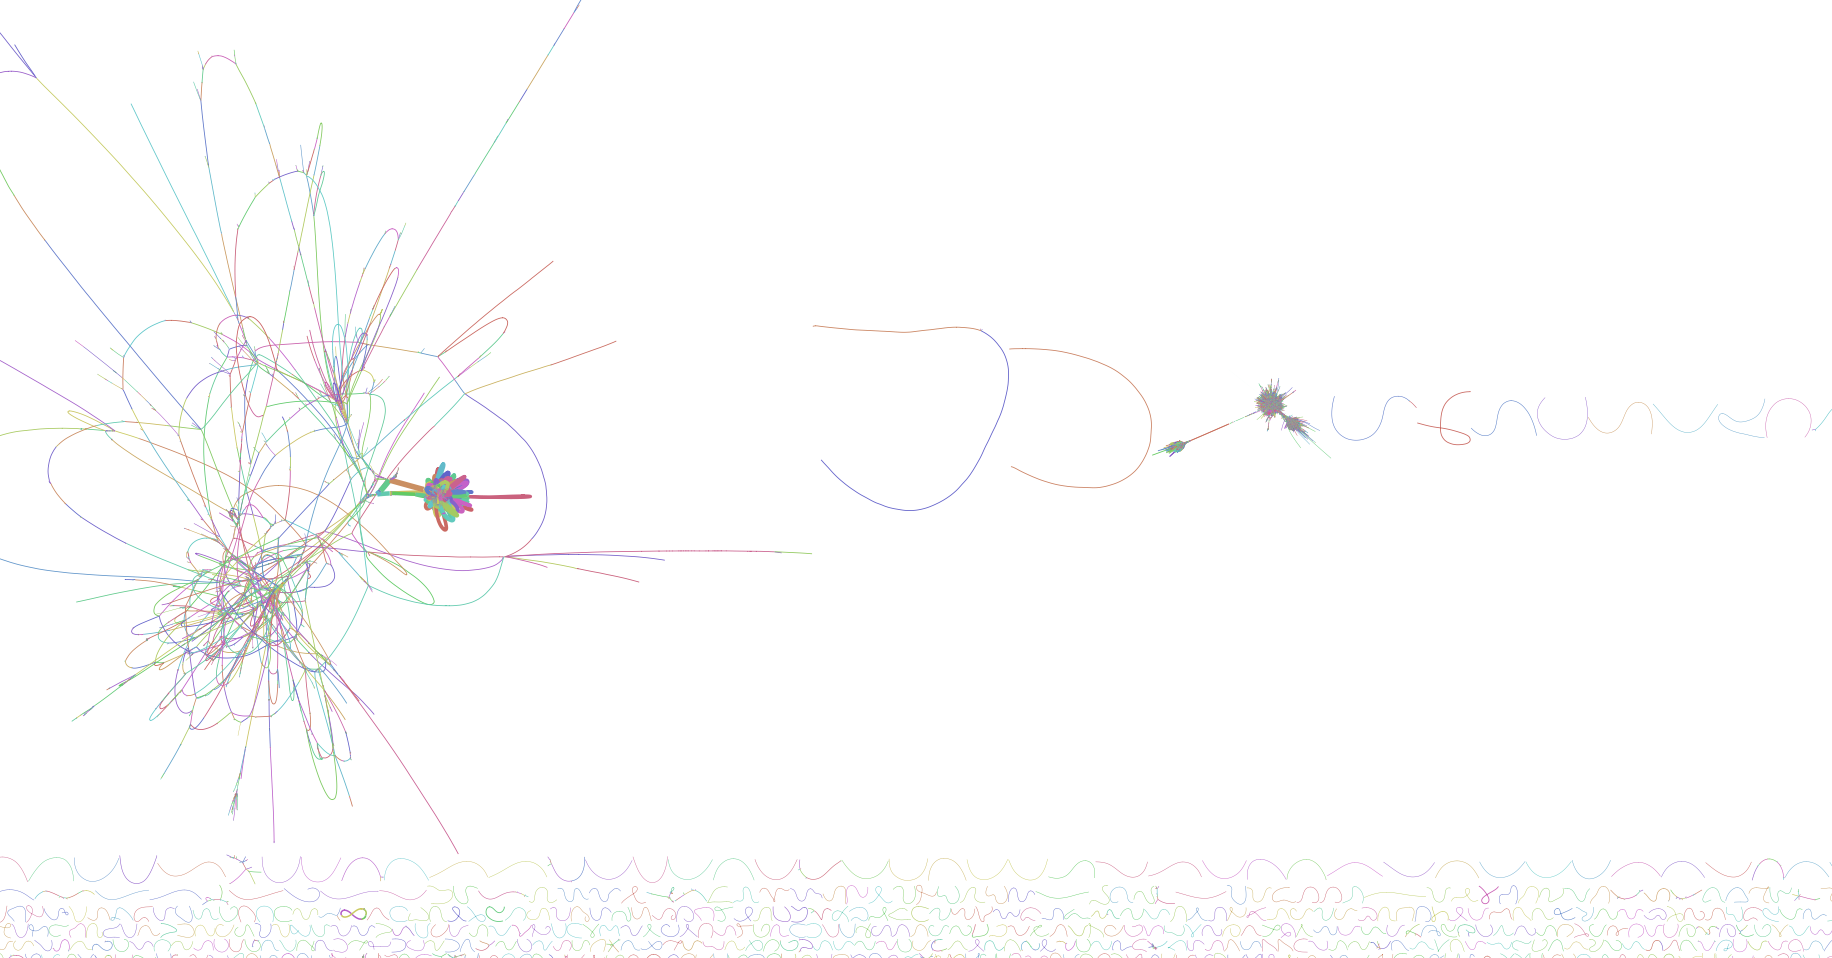

## prepare assembly data
For convenience, we will decompress the assembly. 
Compression was achieved with the `gzip` programme. 
Decompression can be done with the command `gunzip path/to/assembly`. 
1. In the new cell below, decompress the assembly, `gunzip` only gives you output if something went wrong. So no `| head` is needed here.
  - use `zcat your-file.fastq.gz > yourfile.fastq` if gunzip doesn't work. This is the case for the CoCalc environment
  
  
2. In the second cell, use `ls` command to see if it worked the file is still a `.gz` file, or if it was decompressed.
3. Finally, in the third cell, use the `head command` to peak into the assembly like so `head ./data/assembly/scaffolds.fasta | cut -c 1-500`

**[DO:] decompress the assembly and check if you were successfull as indicated above**

In [12]:
gunzip data/assembly/scaffolds.fasta.gz

In [15]:
zcat data/assembly/scaffolds.fasta.gz > data/assembly/scaffolds.fasta

In [16]:
ls data/assembly

scaffolds.fasta  scaffolds.fasta.gz


In [17]:
head data/assembly/scaffolds.fasta | cut -c 1-500

>NODE_1_length_1935275_cov_24.6805_ID_23901540
CAATCGTGCCGACGTTGCAATGCGGCTTGTTACGCTCAAATTTAGCCTTCGCCATGTCCGTACAATCCTAAAAACCAGAATTGAAATCGTATCTTAACTACTTTGCCGTAAACCGGTCAGGGACCGATCCACCGCGAAACTCTGGAGCGGGTGACGGGAATCGAACCCGCGTAGCCAGCTTGGAAGGCTGGAGCTCTACCATTGAGCTACACCCGCCCGCTCACTAGCGAGTTCACACCCGCCAACACCTCGCAACATCGCGCCACCAACCAATAAACACATGCCATAACAGGCAGAATGCTCATCGGGGAGCTTGGTGGAAGGGGTAGGATTCGAACCTACGTAGGCCGAAGCCAACGGGTTTACAGCCCGTCCCCTTTAGCCACTCGGGCACCCTTCCATCTCGCTCGACTCCGCTCAGCGGAGACGCGGACTTATGAGCATTTAACCACCCGTGTCAACTTGAAATCACAGCAAAAACTCCCGTTCGCGCCGATTTC
>NODE_2_length_1021023_cov_23.722_ID_28578184
GGCGCGGGCTTTTGCTTGCGCAGCGCTCCAGCACCTACAATCTCGAACCCGTAGCCTTGTCGAAAAGATGGGCCTTGCCGACATCCGGCGCGAGGTGAATGGTCTCGCCGGGCTGAAGGGCGATGCGTTCACGGAAGAGGCCGACGATGTCGTGGTTGCCAAGGCGGACCACGACTTGTGTTTCCGATCCGGTCGGCTCGATGACGACGACCTTCACGGGGATTCCGGCATCGGAGACCGTGAAATGTTCCGGCCGAATGCCGTAGATCAGGGGCTTGCCCGCGGTATCTGAAGGGGCAGCGCTGAGCGGCAGGTGGACACCTTCCGGTGTTACGAAGCTGGGCCGCCCGTCGCTGCCGATTGCCACTGTGCCGTCGATCAGATTCATCGACGGTGAGCCGATGAA